# **Segmentación de clientes para lanzamiento de campañas de marketing**

## Fase I Contexto y definición del problema
Las empresas trabajan incansablemente para aumentar su productividad. Para lograr esto se valen de tecnologías avanzadas que han ido aumentando significativamente. Machine Learning ha logrado que las empresas encuentren insights importantes a partir de los datos de sus clientes. 
La segmentación ha acaparado la atención y ha sido de uso constante en el marketing estratégico que puede ayudar a ofrecer productos específicos de acuerdo al segmento logrado, identificación de nuevos mercados, consolidación de marca, oportunidades en nuevos productos, entre otros.

### Pregunta de Investigación
¿ Cómo construir un modelo de Machine Learning No supervisado que permita segmentar los clientes de un Banco de New York para ofrecer campañas de marketing de acuerdo a sus necesidades particulares?

## Fase II Objetivos
### Objetivo General
Diseñar un modelo de segmentación que permita lanzar campañas de marketing dirigida a los clientes de un banco en la ciudad de New York.

### Objetivos Específicos	
* Encontrar, a partir de análisis descriptivo de datos, características similares de grupos de clientes que puedan ayudar a identificar sus necesidades particulares.
* Seleccionar el número óptimo de Clusters que permita una adecuada segmentación de mercado específico.
* Investigar y aplicar modelo de análisis de componentes principales PCA que permita establecer una varianza explicada de los datos de mínimo 90%.


### Revisión de la Literatura, Estado del Arte, Bibliografía

### Variables de Segmentación
Las variables más encontradas en la segmentación son: geográficas, demográficas, de comportamiento, comportamiento de pagos, datos personales, psicográficas, frecuencia de compras, lealtad de compra, ingresos, preferencias de productos.

### Modelos de Segmentación
Cuando se construye un modelo es importante analizar las técnicas o métodos que ya han sido procesados. Algunos como:  
•	Métodos descriptivos a priori  
•	Métodos predictivos a priori  
•	Métodos descriptivos post-hoc  
•	Métodos predictivos post-hoc  

### Objetivos de la Segmentación
Los objetivos principales en los artículos consultados son:  
•	Estrategias de marketing.  
•	Identificación de nuevos mercados.  
•	Definición de políticas de precios o cambios en productos existentes.  
•	Oportunidades en nuevos productos.  
•	Programas de retención de clientes.  
•	Asignación de recursos en programas de marketing.  

### Validez de los modelos de Segmentación
Así se tenga un esquema de segmentación muy ajustado, no es seguro que se tenga un número de clusters o segmentos significativo y útil.  
Existen medidas para determinar la precisión del modelo, tanto interno como externamente.   
Una muy utilizada es la agrupación o clasificación analizando múltiples veces descubriendo consistencias en las soluciones.  
El otro método muy usado es el cross-validation dividiendo los datos en partes y realizar análisis para ir aumentando la consistencia entre las muestras halladas.

### Bibliografía
•	Hiziroglu, A. (2013). Soft computing applications in customer segmentation: State-of-art review and critique. Expert Systems with Applications, 40(16), 6491-6507.  
•	Al-Khatib, J. A., Stanton, A. A., & Rawwas, M. Y. A. (2005). Ethical segmentation of consumers in developing countries: a comparative analysis. International Marketing Review, 22, 225–246.  
•	Ezenkwu, C. P., Ozuomba, S., & Kalu, C. (2015). Application of K-Means algorithm for efficient customer segmentation: a strategy for targeted customer services.


## Fase III Obtención de los datos
### DataSet del sitio Kaggle
__[Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata)__

In [20]:
## Cargar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
### Cargar Dataset

creditcard_df = pd.read_csv("Marketing_data.csv")

In [22]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Resumen de variables

**CUSTID** : Identificación del titular de la tarjeta de crédito  
**BALANCE** : Cantidad de saldo que queda en la cuenta del cliente para hacer compras  
**BALANCEFREQUENCY** : Frecuencia de la actualización del saldo(1 = actualizado con frecuencia, 0 = caso contrario)  
**PURCHASES** : Cantidad de compras realizadas  
**ONEOFFPURCHASES** : Importe máximo de compra realizado en una sola vez  
**INSTALLMENTSPURCHASES** : Importe de la compra realizada en cuotas  
**CASHADVANCE** : Anticipo otorgado al usuario  
**PURCHASESFREQUENCY** : frecuencia con la que se realizan las compras(1 = compras frecuentes, 0 = compras no frecuentes)  
**ONEOFFPURCHASESFREQUENCY** : frecuencia que las compras se realizan de una sola vez (1 = con frecuencia, 0 = caso contrario) 
**PURCHASESINSTALLMENTSFREQUENCY** : frecuencia que se realizan las compras a plazos (1 = con frecuencia, 0 = caso contrario)  
**CASHADVANCEFREQUENCY** : con qué frecuencia el gasto se paga por adelantado  
**CASHADVANCETRX** : número de transacciones realizadas con "Efectivo por adelantado"  
**PURCHASESTRX** : número de transacciones de compras realizadas  
**CREDITLIMIT** : límite de tarjeta de crédito para el usuario  
**PAYMENTS** : Número de pagos realizados por el usuario  
**MINIMUM_PAYMENTS** : cantidad mínima de pagos realizados por el usuario  
**PRCFULLPAYMENT** : porcentaje del pago total pagado por el usuario  
**TENURE** : Años que el usuario lleva usando el servicio de tarjeta de crédito  

## Fase IV Preparación y Limpieza de Datos
### Valores NA de cada variable

In [23]:
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
# Reemplazar NA por el valor promedio de la columna
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [25]:
# Dataset sin la columna Customer ID
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

## Fase V Exploración y Análisis Descriptivo
### Estadísticos de cada variable

In [26]:
round(creditcard_df.describe(),2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.61,2895.06,2330.59,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,170.86,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,335.63,0.00,12.00
75%,2054.14,1.00,1110.13,577.41,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,864.21,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


In [27]:
# Vamos a investigar quien ha hecho una compra de mas de $30761!
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] > 30761]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
501,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3937,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12


### Análisis de Correlación
correlations = creditcard_df.corr()

<AxesSubplot:>

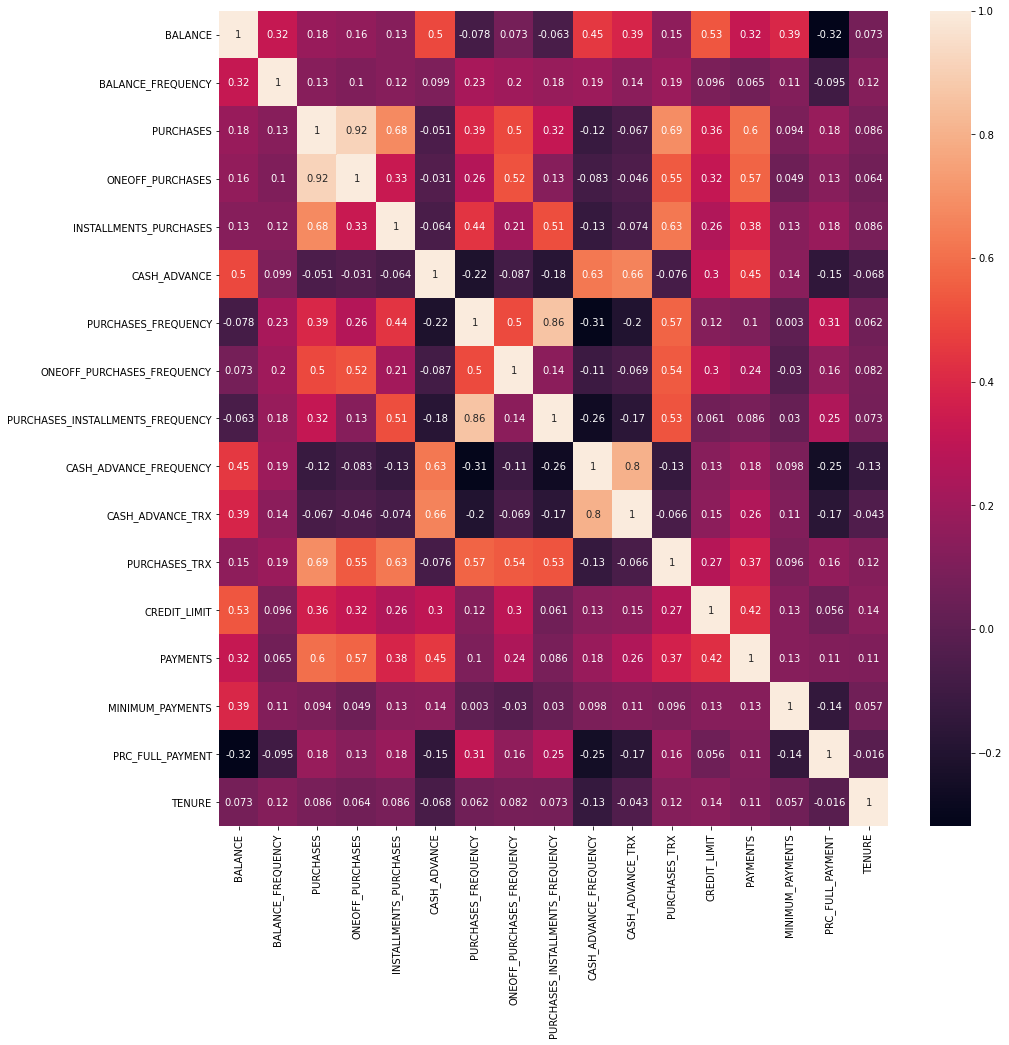

In [29]:
## Mapa de Correlaciones
# Hay correlación muy alta entre cantidad de compras realizadas e importe máximo de compra realizado de una sola vez. Es decir, quien compra, compra de forma directa, sin plazos.
# Hay correlación alta entre cantidad de compras realizadas, número de transacciones de compras realizadas y número de pagos realizados por el usuario.

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True)

In [30]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

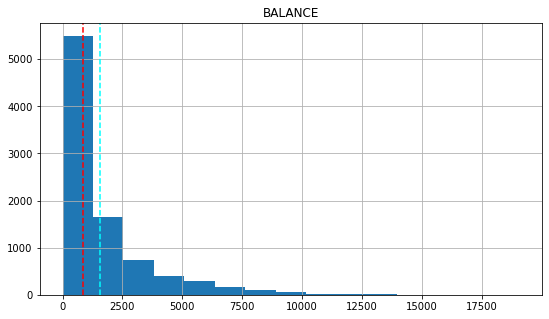

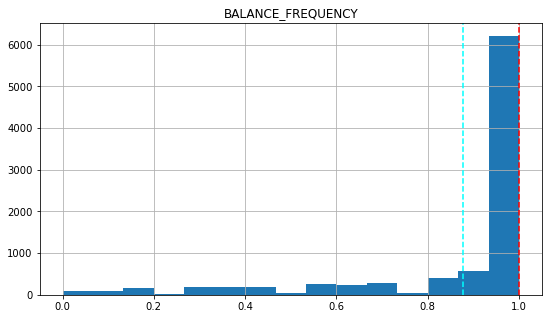

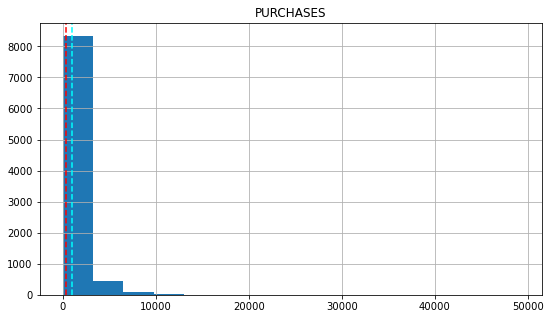

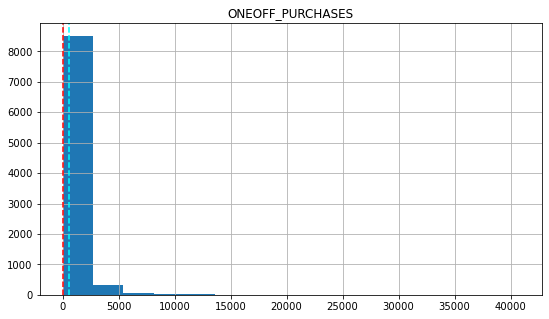

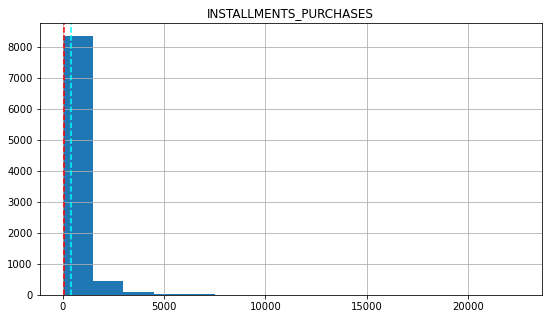

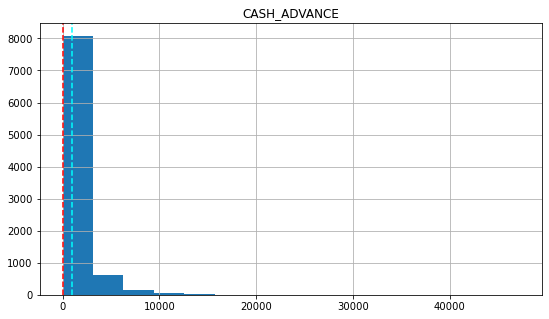

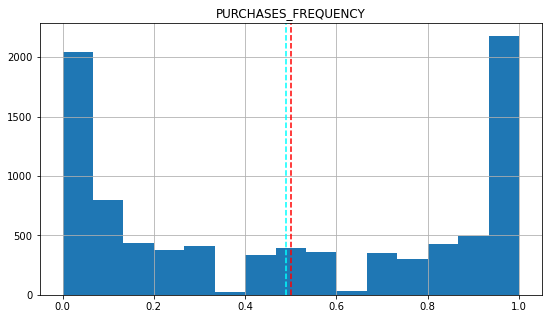

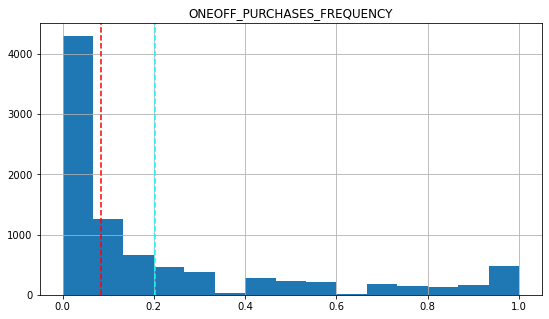

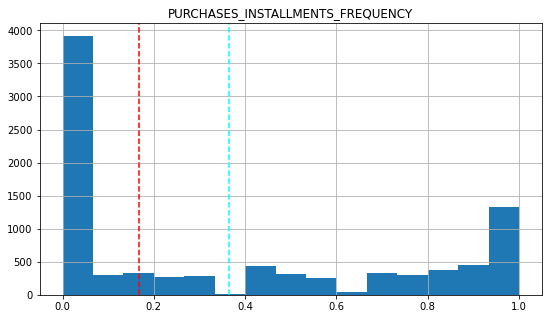

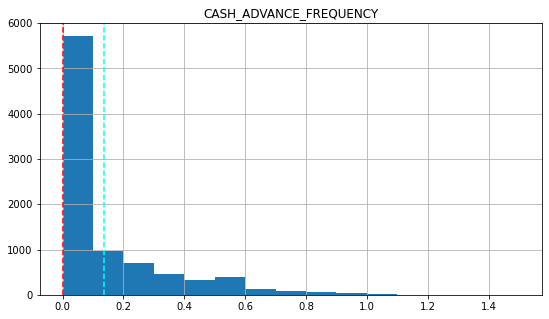

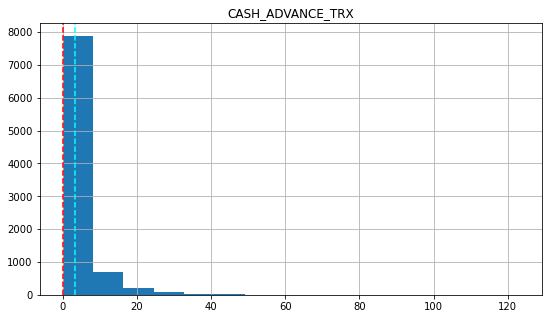

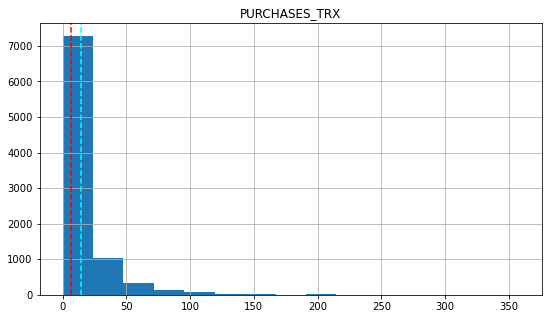

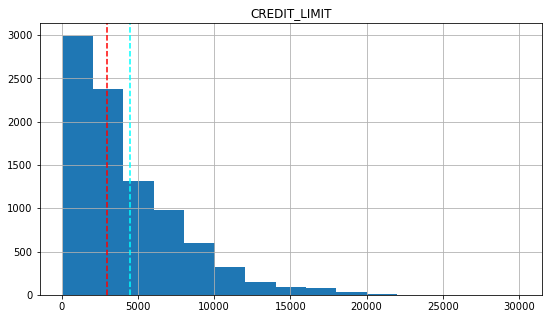

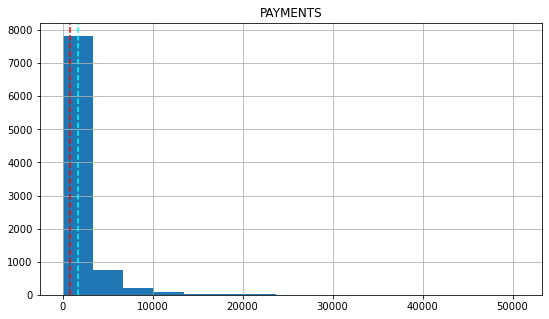

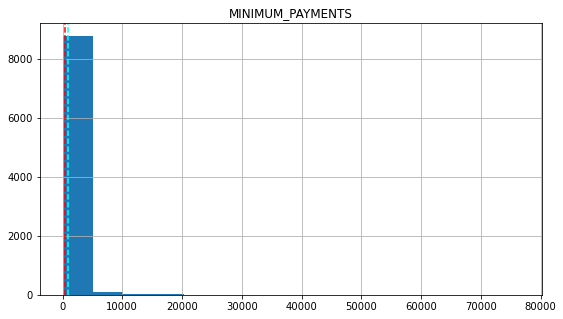

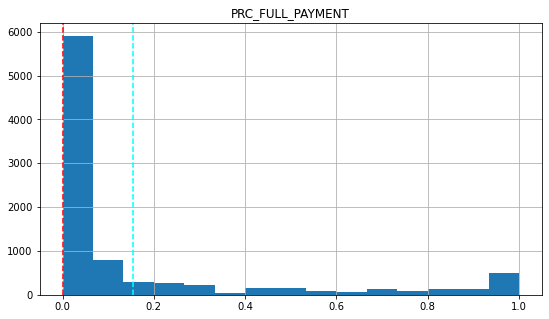

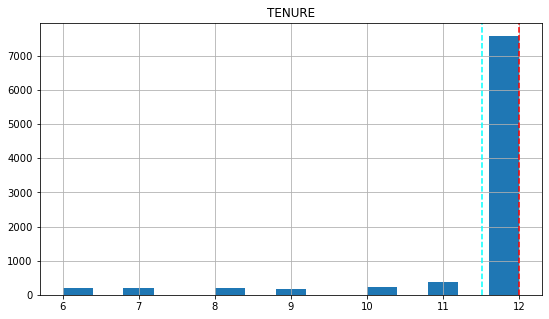

In [31]:
# Histograma de todas las variables (numericas) con Linea roja (mediana), linea cyan (media)
# k como numero de bins óptimo

k = int(np.ceil(1+np.log2(8950)))
numeric_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

for col in numeric_features:
    fig = plt.figure(figsize = (9, 5))
    ax = fig.gca()
    feature = creditcard_df[col]
    feature.hist(bins = k, ax = ax)
    ax.axvline(feature.mean(), color = "cyan", linestyle = "dashed") 
    ax.axvline(feature.median(), color = "red", linestyle = "dashed")
    ax.set_title(col)
plt.show();

In [ ]:
# El balance promedio es aproximadamente $1564 
# La frecuencia del balance se actualiza bastante a menudo, aproximadamente 0.9 en promedio
# El promedio de las compras es de aproximadamente $1000
# El importe máximo de compra no recurrente es en promedio de aproximadamente $600
# El promedio de la frecuencia de las compras está cerca de 0.5
# Bajo promedio para las variables frecuencia de compras de una sola vez y en cuotas y frecuencia de pago por adelantado
# El promedio del límite de crédito es de aproximadamente $4500
# El porcentaje de pago completo es 15% (bajo)
# Los clientes llevan de promedio en el servicio 11 años

# Histograma - Boxplot de variable BALANCE

label = creditcard_df['BALANCE']

fig, ax = plt.subplots(2, 1, figsize = (9, 10))

ax[0].hist(label, bins = k)
ax[0].set_ylabel("Frecuencia")

ax[0].axvline(label.mean(), color = "red", linestyle = "dashed")
ax[0].axvline(label.median(), color = "cyan", linestyle = "dashed")

ax[1].boxplot(label, vert = False)
ax[1].set_xlabel("BALANCE")

fig.suptitle("BALANCE");

In [32]:
# Escalado de los datos. 
# Como es un algoritmo basado en distancias y hay variables con magnitudes muy diferentes, es necesario escalar
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

## Fase VI Modelado de Datos
### Análisis de PCA

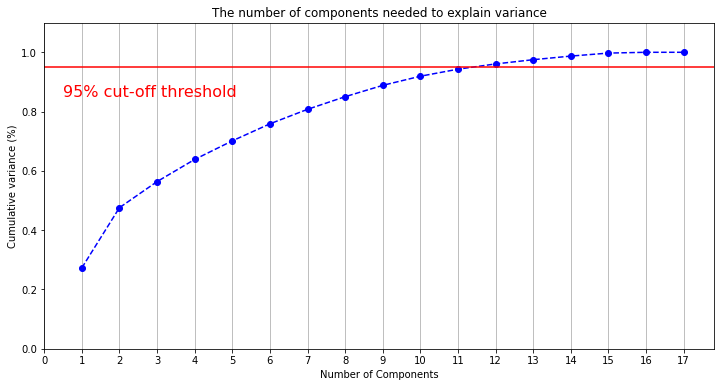

In [33]:
# Número de componentes principales para que la varianza explicada esté en mínimo 80%
pca = PCA().fit(creditcard_df_scaled)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [34]:
# Reducir las dimensiones (variables) con PCA
pca = PCA(n_components = 7)
principal_comp = pca.fit_transform(creditcard_df_scaled)

# La varianza con 7 componentes explica el 80% del total de los datos
pca.explained_variance_ratio_.sum()

0.8076422098367032

In [35]:
# DataFrame con las 7 componentes
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2", "pca3", "pca4", "pca5", "pca6", "pca7"])

### Segmentación K-Means

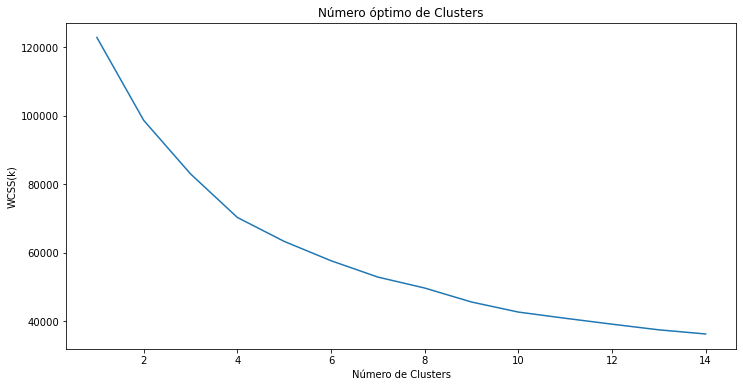

In [36]:
# 4 Clusters parece ser un buen numero
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title("Número óptimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

### Resultados Segmentación

Con el gráfico del "método del codo" podemos ver que 4 Clusters puede ser un buen número, aunque los valores también pueden reducirse de forma lineal cuando llegan al valor de 8

**Primer Cluster de Clientes**: Estos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con el manejo de su tarjeta al pagar con frecuencia el gasto por adelantado, alta cantidad de compras y anticipo en efectivo.

**Segundo Cluster de Clientes** Son el grupo de clientes que usan su tarjeta de crédito a plazos, por lo tanto generan rentabilidad y una frecuencia muy alta de compras. Porcentaje muy bajo de saldo y anticipos en efectivo. Cantidad de saldo bajo para hacer compras. Alta probabilidad de incumplimiento por sus hábitos de pago. Campañas de sensibilización y educación financiera

**Tercer Cluster de Clientes**: Cluster de recuperación. Este grupo de clientes son los que menos compras realizan y pagan por adelantado. Campañas de fidelización y conocimiento de productos.

**Cuarto Cluster de Clientes**: Son los clientes VIP que tienen un límite de crédito alto de aproximadamente $10000 y un porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto. Compradors compulsivos. Ofrecer los mejores servicios a este segmento.

In [37]:
# Etiquetas de los clusters
kmeans = KMeans(4)
kmeans.fit(pca_df)
labels = kmeans.labels_

In [38]:
kmeans.cluster_centers_.shape

(4, 7)

In [39]:
# Asignar cluster a cada observacion original
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head(5)
#creditcard_df_cluster[creditcard_df_cluster["cluster"] == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


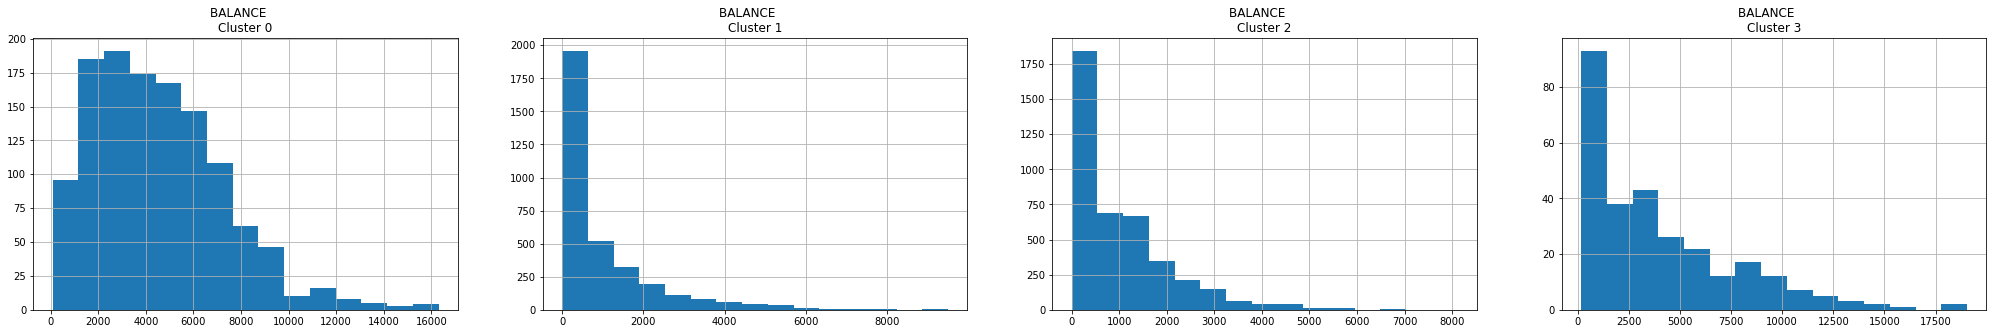

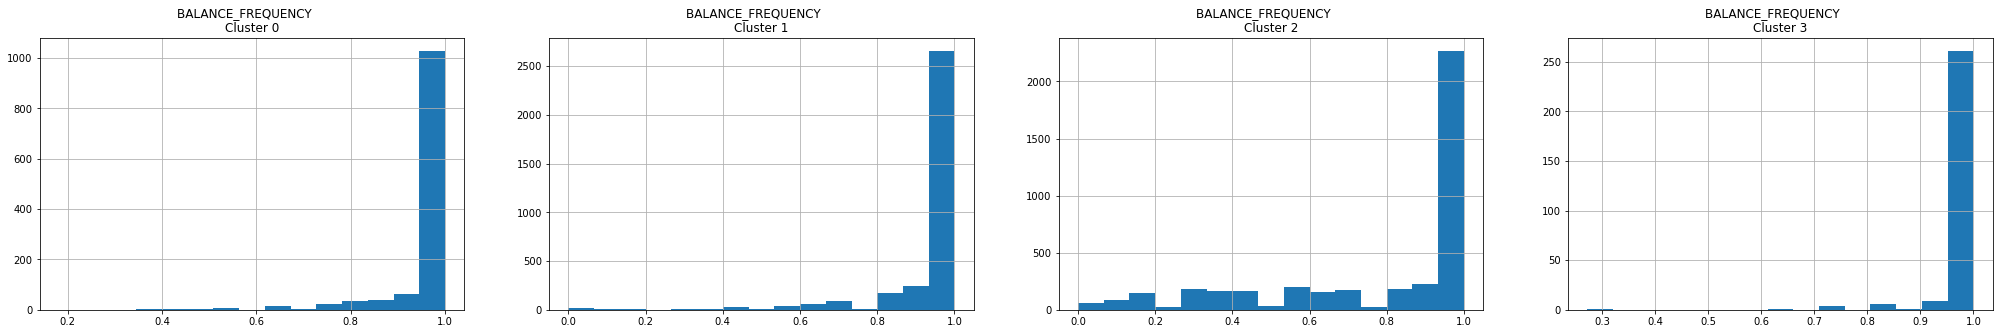

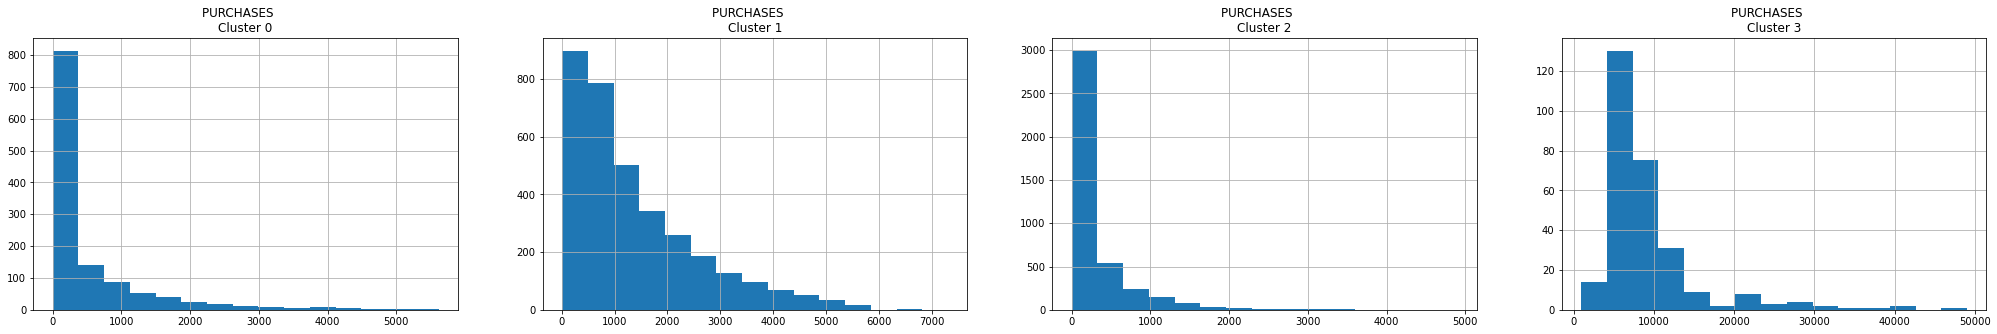

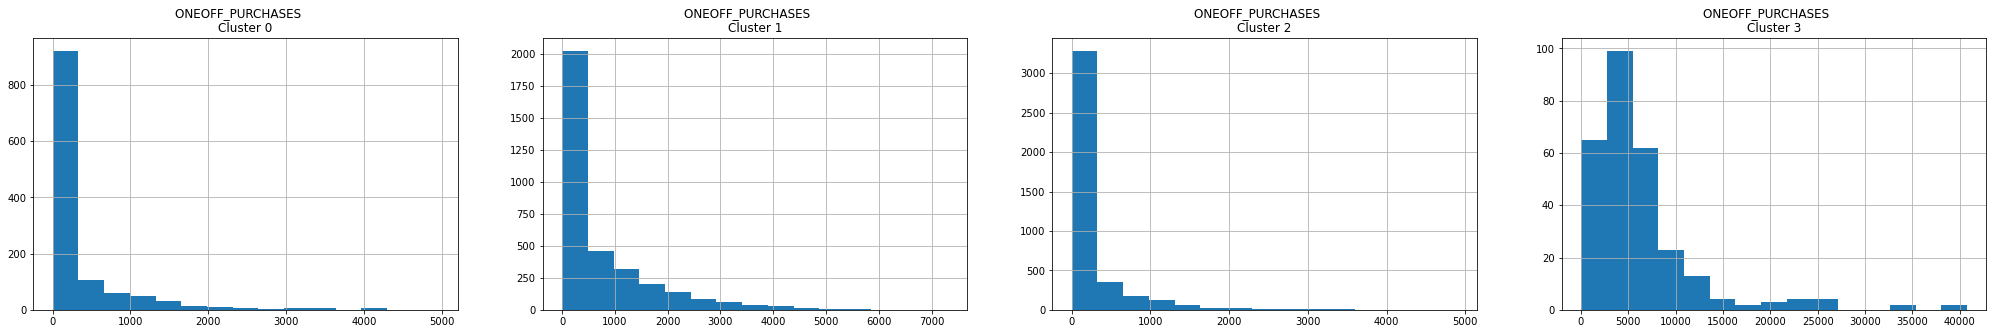

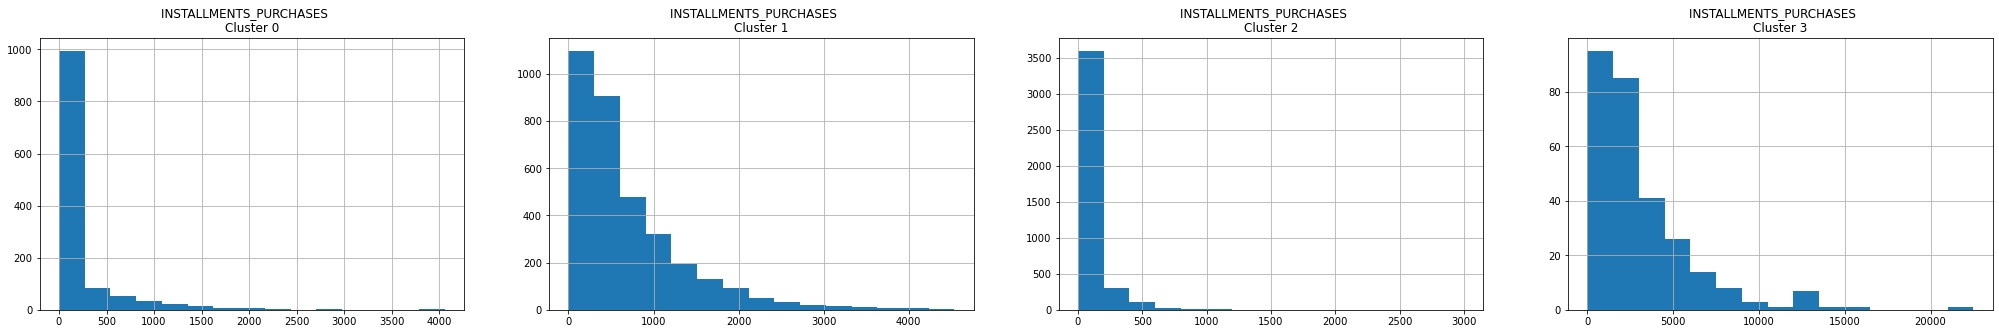

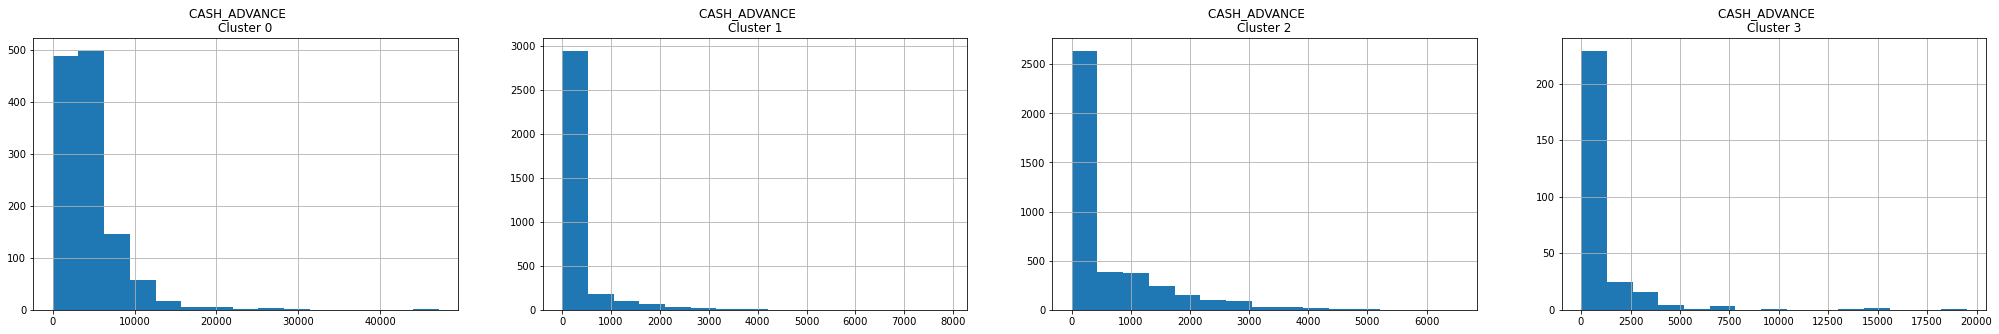

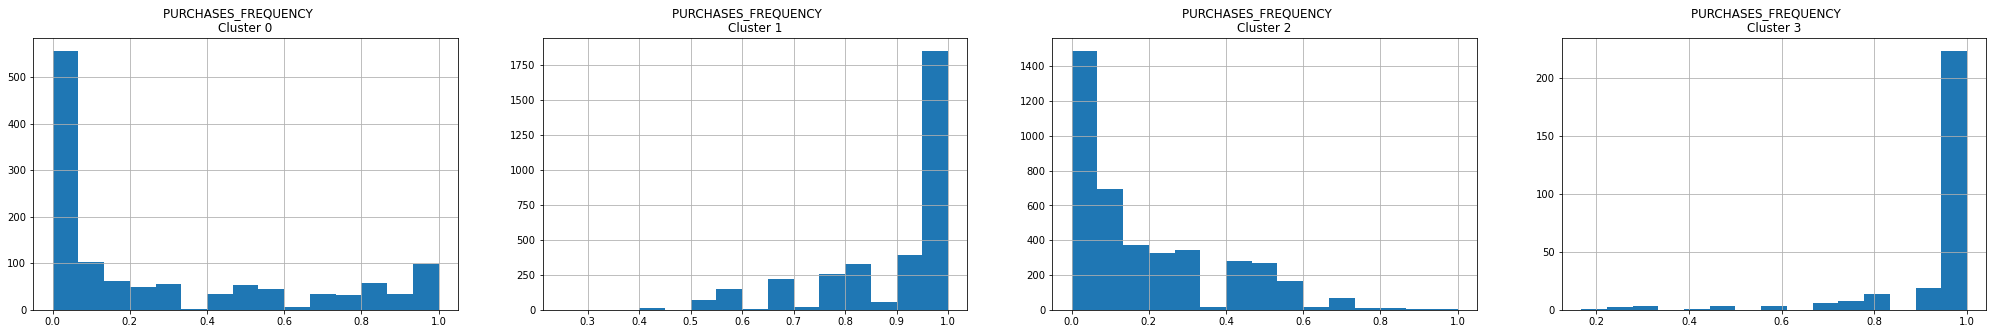

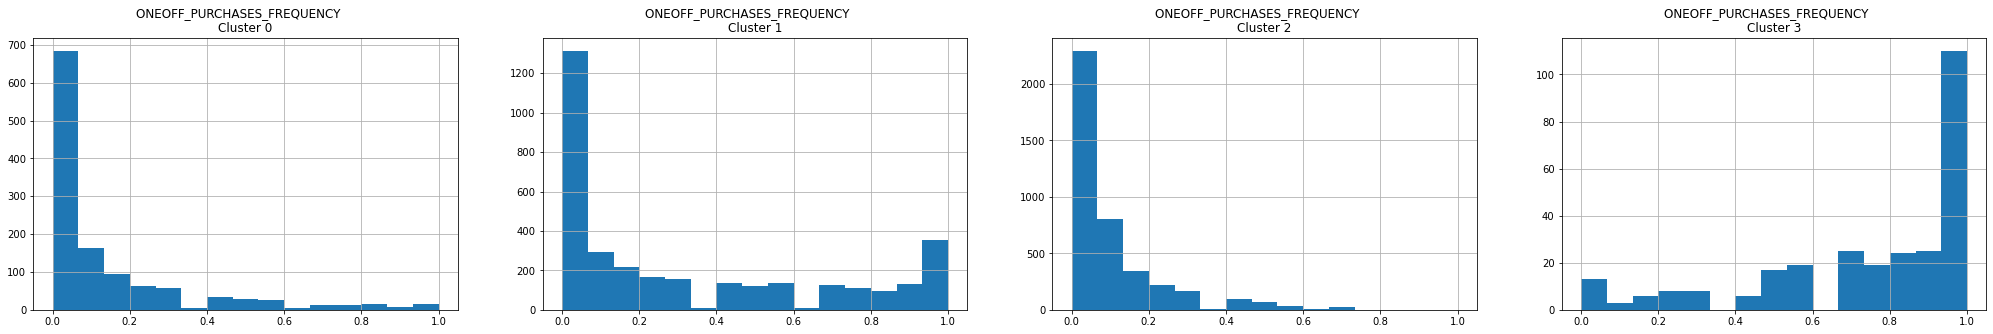

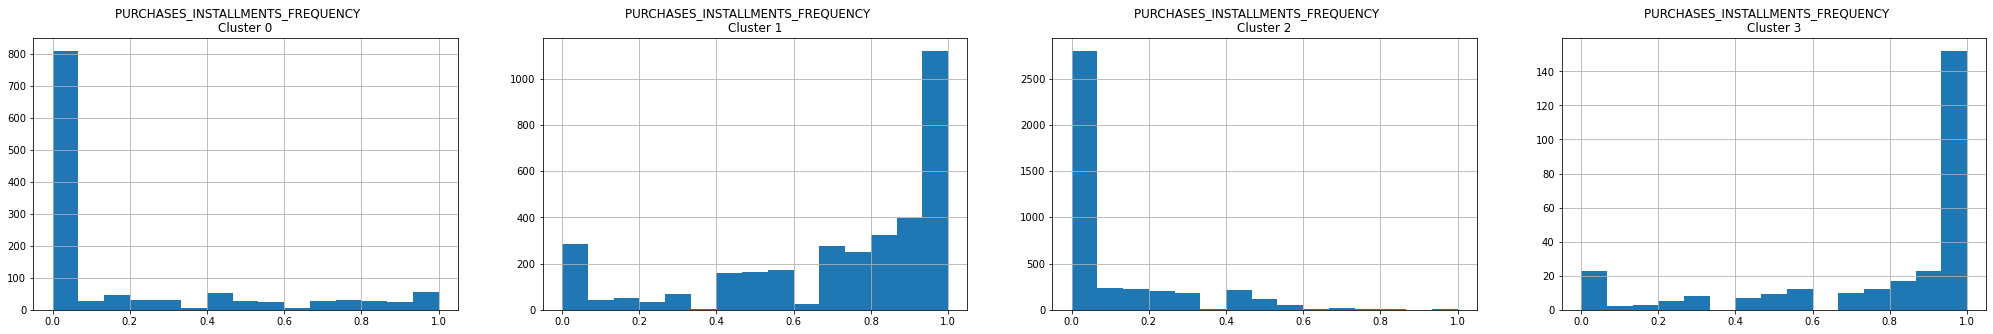

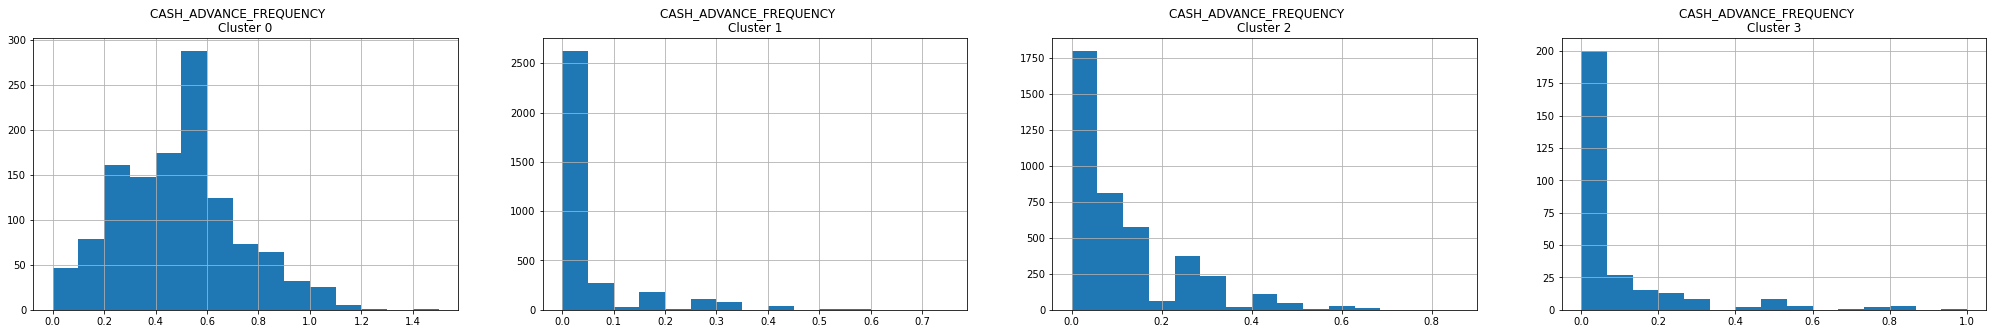

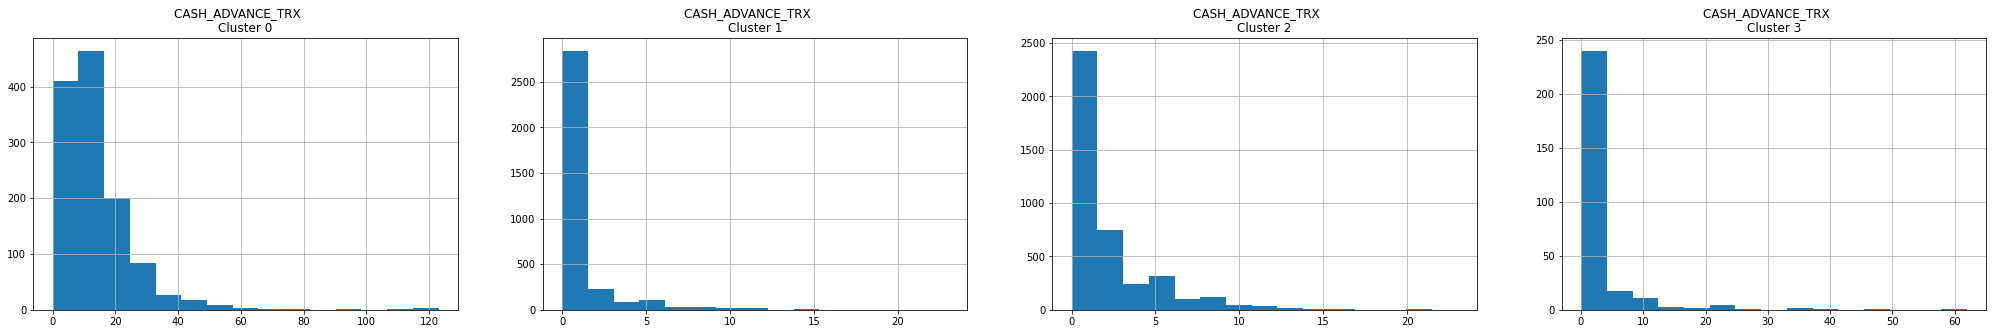

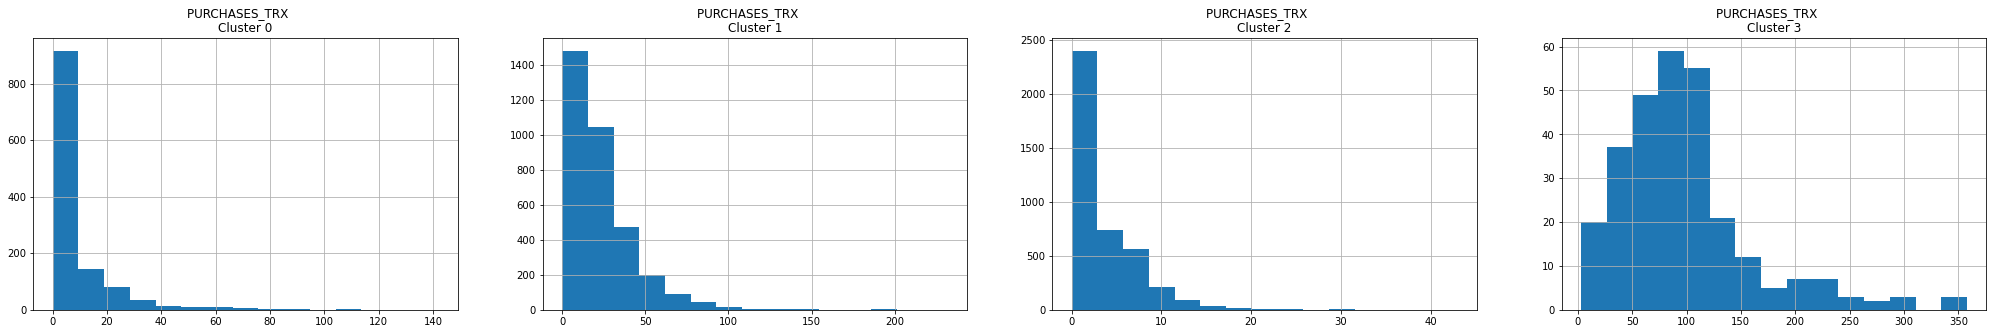

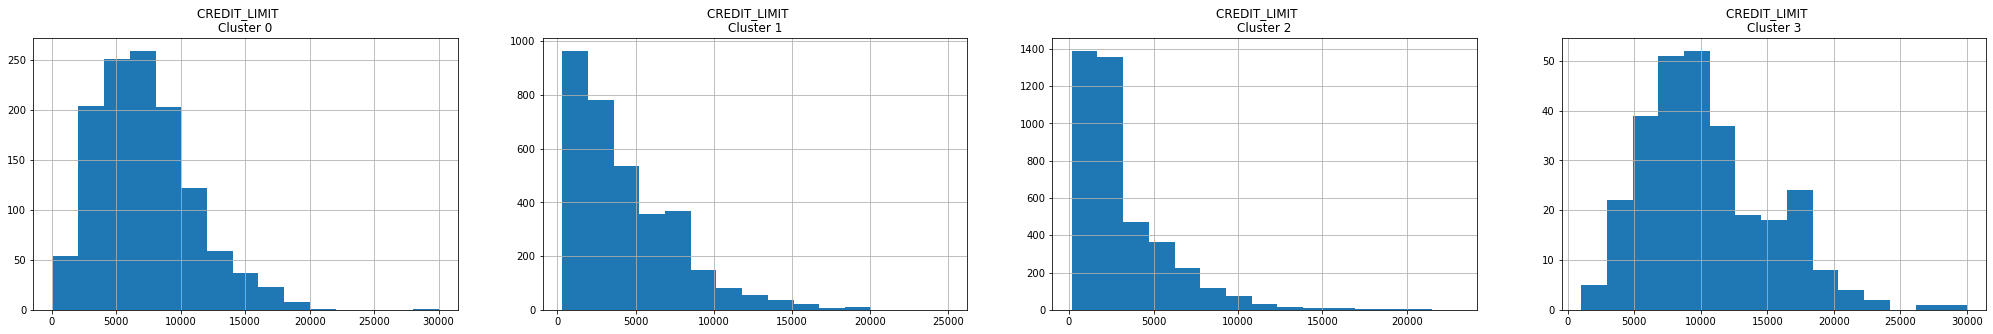

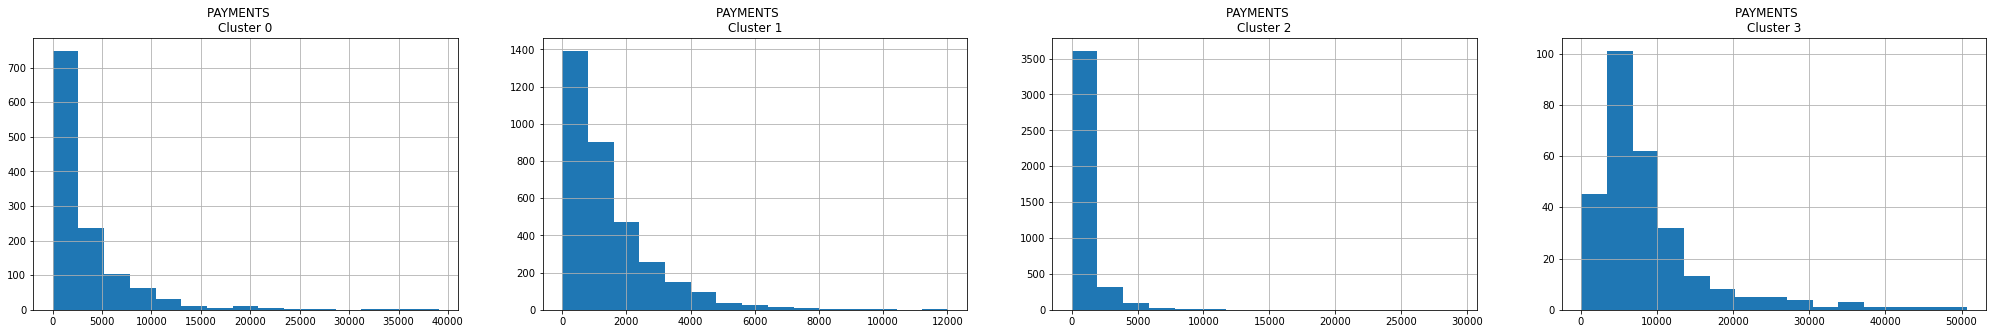

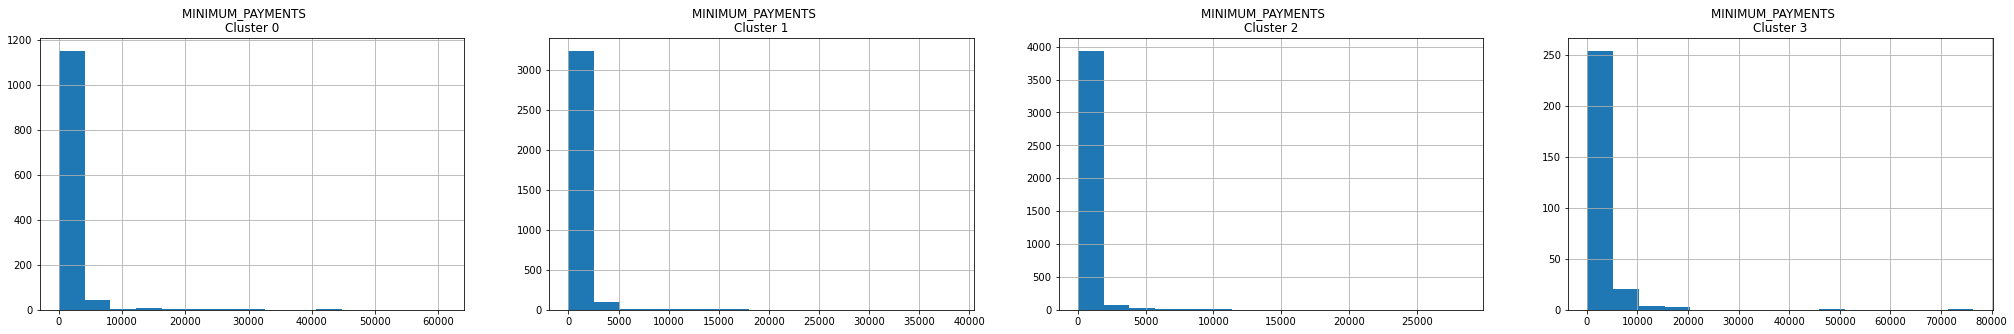

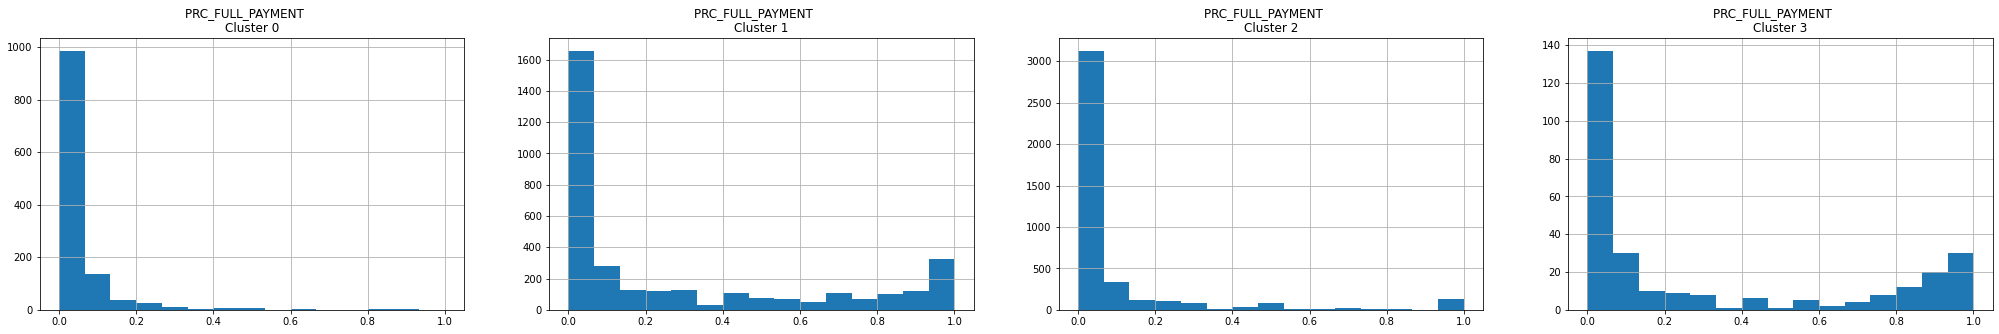

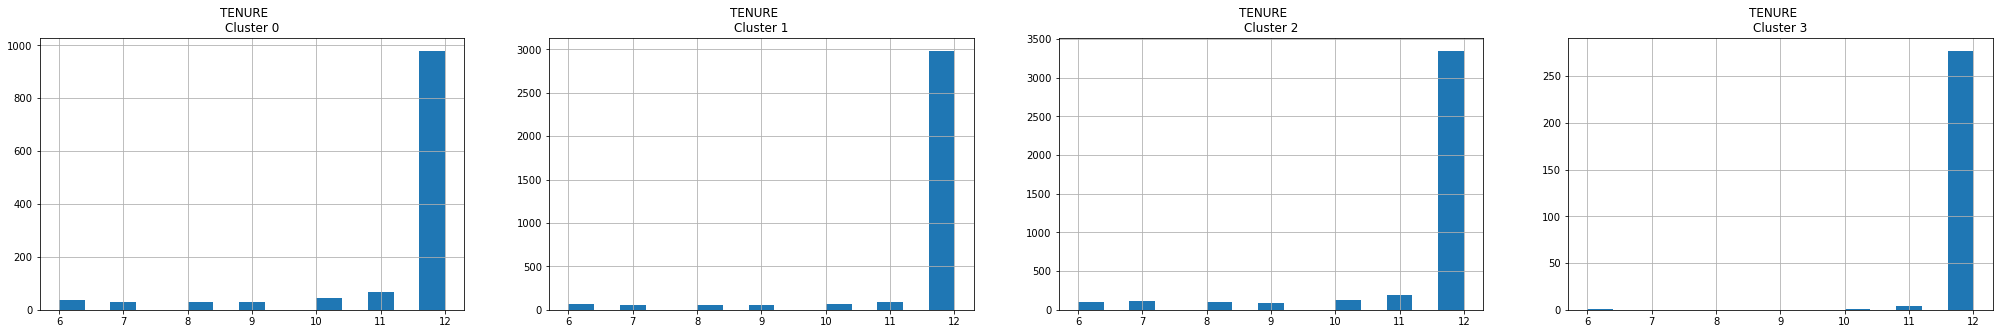

In [64]:
# Histogramas para cada cluster 
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = k)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

## Fase VII Conclusiones y Trabajo Futuro

El uso de herramientas de Machine Learning serían de gran ayuda en diferentes industrias que buscan mejorar su rentabilidad y productividad.  

Uno de los objetivos principales del marketing es generar rentabilidad a través de la buena relación con los mercados segmentados a los cuales llega, y poder ofrecer servicios diferenciados dependiendo de las necesidades de cada uno de los clientes.  Es por esto, que establecer estrategias y campañas de marketing diferenciadas, sería más eficiente si se desarrolla una segmentación a partir de variables de comportamiento de productos y/o servicios en lugar de establecer un plan de marketing igual para todos los clientes.  

Como trabajo futuro, se plantea realizar las soluciones propuestas en este modelo desarrollado con datos diferentes y en diferentes industrias. Además, sería importante ver, a partir del modelo, comportamiento de los clientes en ciertos periodos, con diferentes productos y también poder predecir el comportamiento de los clientes.
También se podría predecir el producto o servicio a ofrecer para nuevos clientes de acuerdo con algunas características o variables de entrada y, de esta manera, confluir esfuerzos para realizar campañas eficientes de marketing. 